
1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。


In [12]:
import pandas as pd
path = 'data/2023_6/open_rank_20236.csv'
df_or = pd.read_csv(file_path)
print(df_or['value'].max())
print(df_or['value'].min())
print(df_or['value'].mean())
print(df_or['value'].median())

1394.45
200.68
346.9679
273.66999999999996


2. 读取data中2022文件夹下的activity_2022文件，分析美国排名前十的项目的平均增长率。

In [29]:
df_ac = pd.read_csv('data/2022/activity_2022.csv')
df_ac['growth_rate'] = ((df_ac['202212_value'] - df_ac['20221_value']) / df_ac['20221_value']) * 100
print(f"{df_ac['growth_rate'].mean():.3f}%")

-4.744%


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。


In [27]:
df_cn = pd.read_csv('data/2022/china_2022.csv')
df_gb = pd.read_csv('data/2022/global_2022.csv')

summary_cn = df_cn[['value']].describe()
summary_gb = df_gb[['value']].describe()

print("中国开源领域排名前十的企业统计指标：")
print(summary_cn)
print("\n全球开源领域排名前十的企业统计指标：")
print(summary_gb)

df_cn['growth_rate'] = ((df_cn['valueDelta'] / df_cn['value']) * 100).round(2)
df_gb['growth_rate'] = ((df_gb['valueDelta'] / df_gb['value']) * 100).round(2)

print(f"\n中国开源领域排名前十的企业平均增长率：\n{df_cn['growth_rate'].mean():.3f}%")
print(f"全球开源领域排名前十的企业平均增长率：\n{df_gb['growth_rate'].mean():.3f}%")

中国开源领域排名前十的企业统计指标：
              value
count      10.00000
mean    40269.53400
std     30905.17181
min     12033.71000
25%     15161.03750
50%     29789.23500
75%     58554.96250
max    103368.49000

全球开源领域排名前十的企业统计指标：
               value
count      10.000000
mean   215855.491000
std    235189.889662
min     71636.820000
25%     89080.312500
50%    102790.850000
75%    252184.732500
max    824848.670000

中国开源领域排名前十的企业平均增长率：
35.848%
全球开源领域排名前十的企业平均增长率：
9.298%


4. 贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86
根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [26]:
P_A = 0.25
P_B_A = 0.85
P_B_not_A = 0.10
P_not_A = 0.75

P_B = P_B_A * P_A + P_B_not_A * P_not_A

P_A_B = (P_B_A * P_A) / P_B

print(f"{P_A_B:.3f}")

0.739


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [31]:
P_C = 0.50
P_D_C = 0.35
P_D_not_C = 0.10
P_not_C = 0.50

P_D = P_D_C * P_C + P_D_not_C * P_not_C

P_C_D = (P_D_C * P_C) / P_D

print(f"{P_C_D:.3f}")

0.778


6. 根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

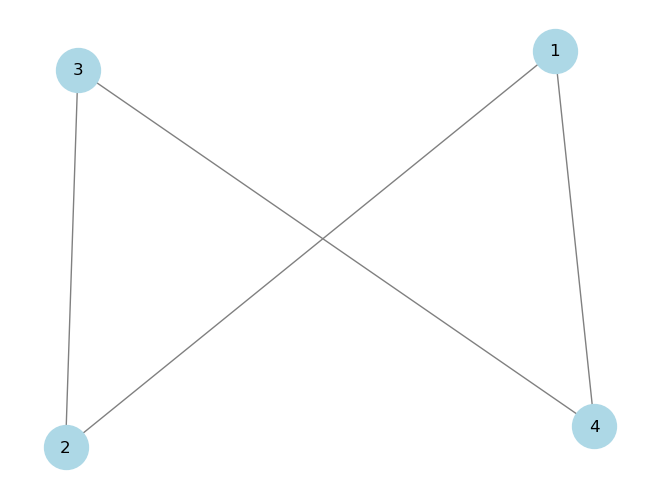

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray')
plt.show()

7. 根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

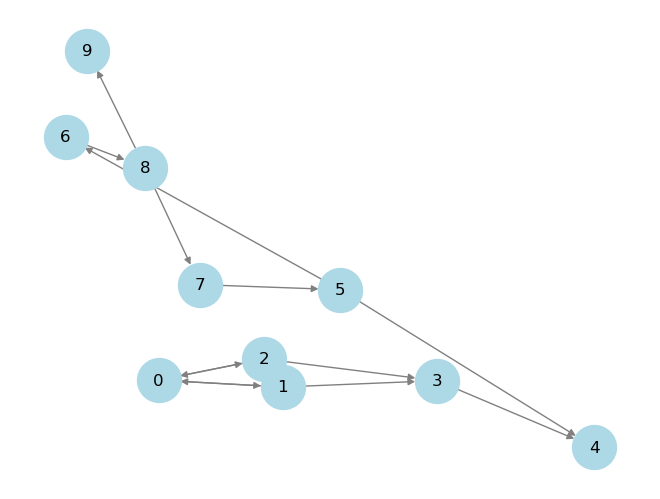

In [46]:
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', arrows=True)
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

{0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


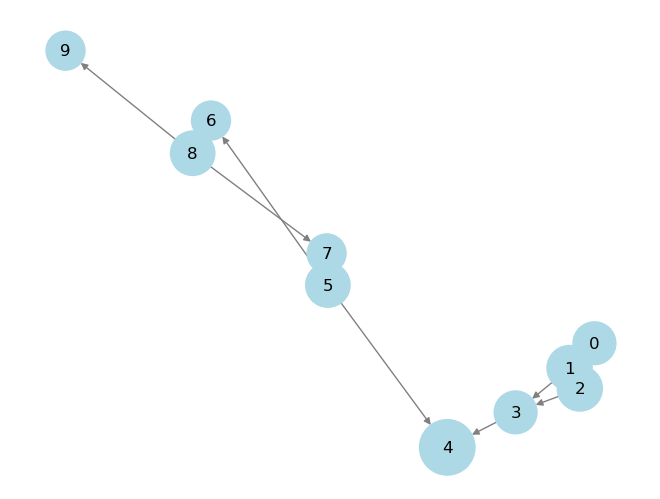

In [52]:
pagerank_scores = nx.pagerank(G)
print(pagerank_scores)
node_size = [10000 * score for score in pagerank_scores.values()]
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=node_size, edge_color='gray', arrows=True)
plt.show()